# Практична робота 5

## Всі методи

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Створюємо функцію для явного метода Ейлера для системи з N рівнянь
def ExplEuler(h,t0,tn,X0,f):
  # h - крок чисельного розв'язання
  # t0 - початковий час, не обов'язково дорівнює 0
  # tn - кінцевий час
  # X0=[x1(t0),x2(t0),....,xN(t0)] - вектор заданих початкових умов
  # f=[f1(X),f2(X),...,fN(X)] - вектор функцій, що задані дифрівнянням
  N=len(X0) #Довжина вектора початкових умов - кількість елементів у ньому, к-ть рівнянь
  n=math.ceil((tn-t0)/h) #кількість кроків, округлена вгору
  t=[t0+i*h for i in range(n+1)]
  t=np.array(t)  #створюємо масив часу
  X=np.array([np.zeros(n+1) for i in range(N+1)]) #заготовка для масивів всіх невідомих функцій
  # 0й елемент (рядок) - порожній, 1й елемент (рядок) - перша невідома ф-я, 
  # 2й елемент (рядок) - друга невідома ф-я, і т.д.
  X[1:,0]=X0 #вносимо початкові умови
  for i in range(n): #і буде мати значення від 0 до n-1
      X[:,i+1]=X[:,i]+f(t[i],X[:,i])*h #формула явного методу Ейлера для координати
      # X[1:,i] - містить стовпчик значень всіх функцій в момент часу і
  return (t,X,' Explicit Euler Method')

# Створюємо функцію для метода Рунге-Кути 2 порядку
def Runge2(h,t0,tn,X0,f):
  # h - крок чисельного розв'язання
  # t0 - початковий час, не обов'язково дорівнює 0
  # tn - кінцевий час
  # X0=[x1(t0),x2(t0),....,xN(t0)] - вектор заданих початкових умов
  # f=[f1(X),f2(X),...,fN(X)] - вектор функцій, що задані дифрівнянням
  N=len(X0) #Довжина вектора початкових умов - кількість елементів у ньому, к-ть рівнянь
  n=math.ceil((tn-t0)/h) #кількість кроків, округлена вгору
  t=[t0+i*h for i in range(n+1)]
  t=np.array(t)  #створюємо масив часу
  X=np.array([np.zeros(n+1) for i in range(N+1)]) #заготовка для масивів всіх невідомих функцій
  # 0й елемент (рядок) - порожній, 1й елемент (рядок) - перша невідома ф-я, 
  # 2й елемент (рядок) - друга невідома ф-я, і т.д.
  X[1:,0]=X0 #вносимо початкові умови
  for i in range(n): #і буде мати значення від 0 до n-1
      #обчислюємо предиктори-коректори
      K1=f(t[i],X[:,i])
      K2=f(t[i]+h,X[:,i]+h*K1)
      X[:,i+1]=X[:,i]+(K1+K2)*h/2 #формула методу Рунге-Кути 2 порядку
  return (t,X,' 2nd order Runge-Kutta Method')

# Створюємо функцію для метода Рунге-Кути 2 порядку
def Runge4(h,t0,tn,X0,f):
  # h - крок чисельного розв'язання
  # t0 - початковий час, не обов'язково дорівнює 0
  # tn - кінцевий час
  # X0=[x1(t0),x2(t0),....,xN(t0)] - вектор заданих початкових умов
  # f=[f1(X),f2(X),...,fN(X)] - вектор функцій, що задані дифрівнянням
  N=len(X0) #Довжина вектора початкових умов - кількість елементів у ньому, к-ть рівнянь
  n=math.ceil((tn-t0)/h) #кількість кроків, округлена вгору
  t=[t0+i*h for i in range(n+1)]
  t=np.array(t)  #створюємо масив часу
  X=np.array([np.zeros(n+1) for i in range(N+1)]) #заготовка для масивів всіх невідомих функцій
  # 0й елемент (рядок) - порожній, 1й елемент (рядок) - перша невідома ф-я, 
  # 2й елемент (рядок) - друга невідома ф-я, і т.д.
  X[1:,0]=X0 #вносимо початкові умови
  for i in range(n): #і буде мати значення від 0 до n-1
      #обчислюємо предиктори-коректори
      K1=f(t[i],X[:,i])
      K2=f(t[i]+h/2,X[:,i]+h*K1/2)
      K3=f(t[i]+h/2,X[:,i]+h*K2/2)
      K4=f(t[i]+h,X[:,i]+h*K3)
      X[:,i+1]=X[:,i]+(K1+2*K2+2*K3+K4)*h/6 #формула методу Рунге-Кути 2 порядку
  return (t,X,' 4th order Runge-Kutta Method')

def PlotGraphs(t,X):
  N=len(X[1:,0])
  for i in range(1,N+1):
    fig, ax = plt.subplots()
    plt.plot(t,X[i])
    plt.grid(True)
    plt.xlim(t[0],t[-1])
    plt.xlabel('t')
    plt.ylabel('X'+str(N))
    plt.title('Solution for X'+str(i)+name)

def PhasePortret(X):
    fig, ax = plt.subplots()
    plt.plot(X[1],X[2])
    plt.grid(True)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Phase Portret')
    n=int(len(X[1])/10)
    plt.arrow(X[1,n], X[2,n], X[1,n+2]-X[1,n], X[2,n+2]-X[2,n],
              head_width = abs(2*(X[2,n+2]-X[2,n])))
    
    # Створюємо функцію для аналізу стійкості метода
def StabilityAnalysis(Method,H,t0,tn,x0,f,solution):
  # Method - назва функції, що задає метод
  # f - функція, що задана дифрівнянням
  # H - масив кроків, з якими будемо розв'язувати рівняння та досліджувати стійкість H=(0.01, 0.1, 0.5)
  # solution - функція, що описує аналітичний розв'язок рівняння
    fig, stiykplot = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 8))
    for h in H:
        (T, X, name) = Method(h, t0, tn, x0, f)# в змінні(t, x, name) запише масив часу, масив координати та ім 'я методу
        stiykplot[0].plot(T, X[1], label = 'h=' + str(h))
        stiykplot[1].plot(T, X[2], label = 'h=' + str(h))# print(h)# print(x)
    T = np.arange(t0, tn + 0.01, 0.01)
    X = solution(T)# xmin = np.min(X[0]) * 0.8# xmax = np.max(X[0]) * 1.2
    stiykplot[0].plot(T, X[0], ':', label = 'Solution')
    stiykplot[1].plot(T, X[1], ':', label = 'Solution')
    for i in range(2):
        stiykplot[i].grid(True)
        stiykplot[i].legend()
        stiykplot[i].set_xlim(t0, tn)
        stiykplot[i].set_xlabel('t')# plt.ylim(xmin, xmax)
    stiykplot[0].set_ylabel('Coordinate x')
    stiykplot[1].set_ylabel('Velocity v')
    stiykplot[0].set_title(name + ' for coordinate\ndifferent steps')
    stiykplot[1].set_title(name + ' for velocity\ndifferent steps')

# Створюємо функцію для дослідження похибки від кроку
def Error(Method,H,t0,tn,x0,f,solution):
    n=len(x0) #визначимо кількість рядків
    Er=[[] for i in range(n)]
    for h in H:
        (t,x,name)=Method(h,t0,tn,x0,f) #x - чисельний розв'язок
        sol=solution(t)
        for i in range(n):
            er=math.sqrt(np.sum((sol[i]-x[i+1])**2)/len(sol[i]))
            Er[i]=Er[i]+[er]
    fig, erplot=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    for i in range(n):
        erplot[i].plot(H,Er[i])
        erplot[i].grid(True)
        erplot[i].set_ylim(0,max(Er[i]))
        erplot[i].set_xlabel('Step h')
        erplot[i].set_ylabel('Error')
    erplot[0].set_title('Error dependence for coordinate\non step for '+name)
    erplot[1].set_title('Error dependence for velocity\non step for '+name)



def Errorh2(Method,h,t0,tn,X0,f):
    (t,X,name)=Method(h,t0,tn,X0,f) #x - чисельний розв'язок
    Sol=Method(h/2,t0,tn,X0,f)[1] #x - чисельний розв'язок з кроком вдвічі менше
    N=len(Sol[:,0])
    Er=[]
    for i in range(1,N):
      x=X[i]
      sol=[Sol[1,i] for i in range(len(Sol[0])) if i%2==0]
      if len(x)!=len(sol):
        L=min(len(x),len(sol))
        x=x[:L]
        sol=sol[:L]
      er=math.sqrt(np.sum((sol-x)**2)/len(sol))
      Er=Er+[er]
    return (Er)
def PhasePortret2(X):
    plt.plot(X[1],X[2])
    plt.grid(True)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Phase Portret')
    n=int(len(X[1])/50)
    plt.arrow(X[1,n], X[2,n], X[1,n+2]-X[1,n], X[2,n+2]-X[2,n],
              head_width = 1)


## Завдання 1

Розв'язати систему для трьох початкових умов на вибір![image.png](attachment:image.png) Розв'язуємо для початкових умов (1;1), (1;2) та (2;1) трьома спобами метод явній Ейлера, метод Рунге-Кути 2-го та 4-го порядку

In [ ]:
def task1(t,X):
  f1 = 5*X[1]-4*X[1]*X[2]
  f2 = -2*X[2]+X[1]*X[2]
  return np.array([0,f1,f2])


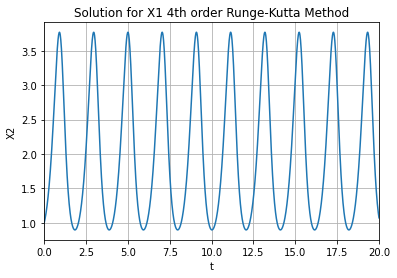

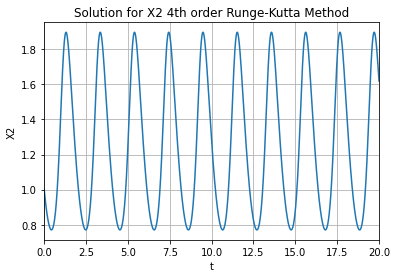

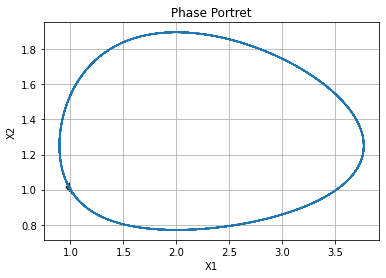

In [ ]:
X01=[1,1]
(T2,X2,name)=Runge4(0.01,0,20,X01,task1)
PlotGraphs(T2,X2)
PhasePortret(X2)

In [ ]:
Errorh2(ExplEuler,0.01,0,1,X01,task1)

[0.020603294951610188, 1.7183577013772124]

In [ ]:
Errorh2(Runge2,0.01,0,1,X01,task1)

[0.00019084002773802963, 1.6948053872641629]

In [ ]:
Errorh2(Runge4,0.01,0,1,X01,task1)

[1.2141877663132164e-08, 1.69480544936012]

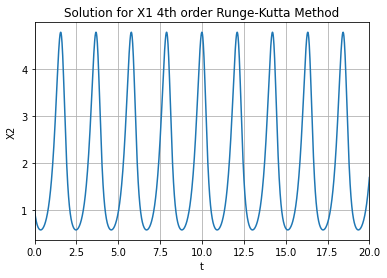

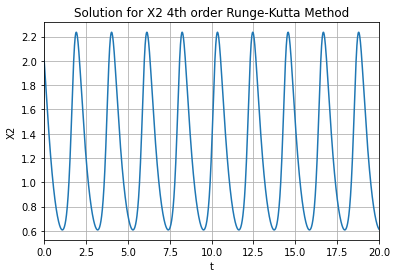

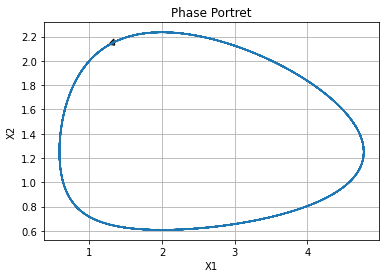

In [ ]:
X02=[1,2]
(T2,X2,name)=Runge4(0.01,0,20,X02,task1)
PlotGraphs(T2,X2)
PhasePortret(X2)

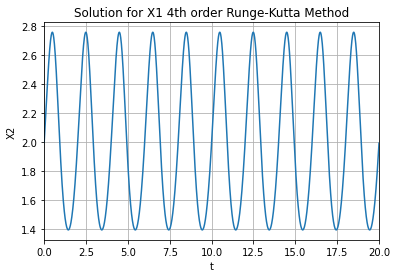

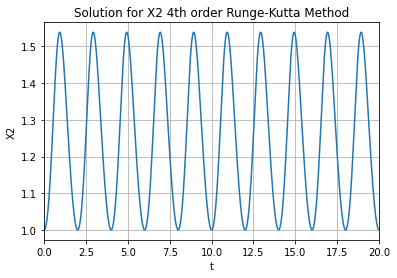

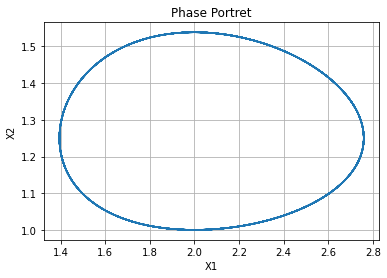

In [ ]:
X02=[2,1]
(T2,X2,name)=Runge4(0.01,0,20,X02,task1)
PlotGraphs(T2,X2)
PhasePortret(X2)

## Завдання 2

Розв'язати ситему ![image-2.png](attachment:image-2.png)



In [ ]:
def task2(t,X):
  f1=1.1*(1-X[1]/12.3)*X[1]-2.5*X[1]*X[2]/(1.5-X[1])#задаємо функцію першого диф-рівняння
  f2= (0.07-0.015*X[2]/X[1])*X[2]#задаємо функцію Другого дифрівняння 
  return np.array([0,f1,f2])
X02=[33,6]

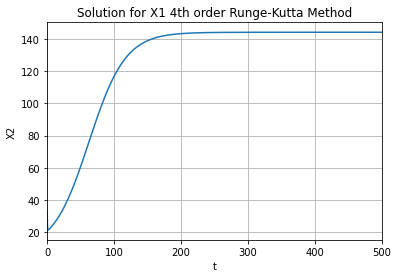

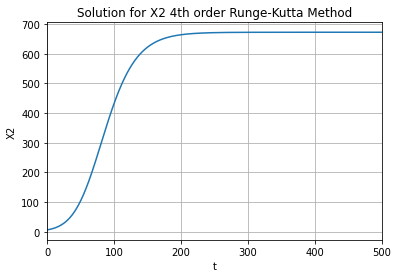

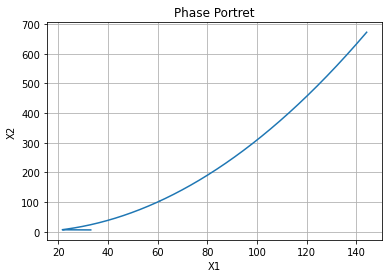

In [ ]:
(T2,X2,name)=Runge4(0.01,0,500,X02,task2)
PlotGraphs(T2,X2)
PhasePortret(X2)

## Завдання 3.

Розв'язати рівняння з практичної №3 методом Рунге-Кути 4-го порядку та порівняти похибку

$$ \frac{d^2y}{dt^2} + 4\frac{dy}{dt} = -7 - 5 cos(7t) $$
$$ t_0 = 0, y(t_0) = 7, \frac{dy}{dt}(t_0)=10, t \in [0;6] $$

Коментарій: Так як краще всього себе показав явний метод Ейлера достатньо порівняти з ним

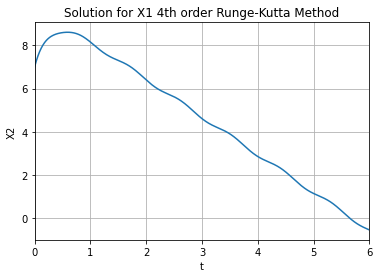

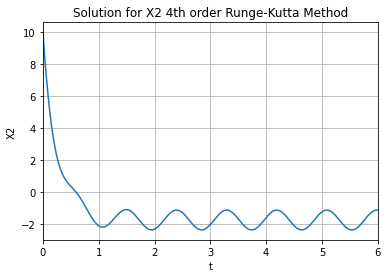

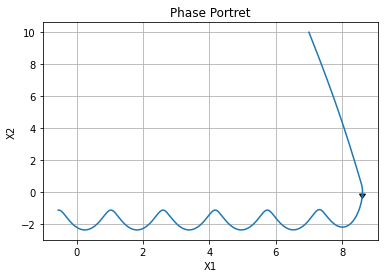

In [ ]:
# Дані задачі: 
(t0, tn, x0) = (0, 6, (7, 10))

#Дифрівняння
def equation1(t,X): # y[1]=dy/dt, y[0] = y
    f1=X[2]
    f2=-7-5*np.cos(7*t)-4*X[2]
    return np.array([0,f1,f2])
# Аналітичний розв'язок
def solution1(t):
    dy = -(7/4)-(627/208)*(-4)*np.exp(-4*t)-(4/91)*7*np.cos(7*t)-(1/13)*7*np.sin(7*t) # похідна від розв'язку
    y = -(7/4)*t-(627/208)*np.exp(-4*t)-(4/91)*np.sin(7*t)+(1/13)*np.cos(7*t)+159/16 # аналітичний розв'язок
    return np.array([y, dy])

X03=[7,10]

(T2,X2,name)=Runge4(0.01,0,6,X03,equation1)
PlotGraphs(T2,X2)
PhasePortret(X2)
#Кроки для стійкості
H1=(0.005, 0.01, 0.05, 0.1, 0.25)

#Кроки для похибки
H2=np.arange(0.002,0.1+0.002,0.002)

#Дуже маленькі кроки для похибки
H2_2=np.arange(0.0002, 0.002, 0.00002)


### Аналіз стійкості (Метод Ейлера/ Рунге-Кути 4-го порядку)

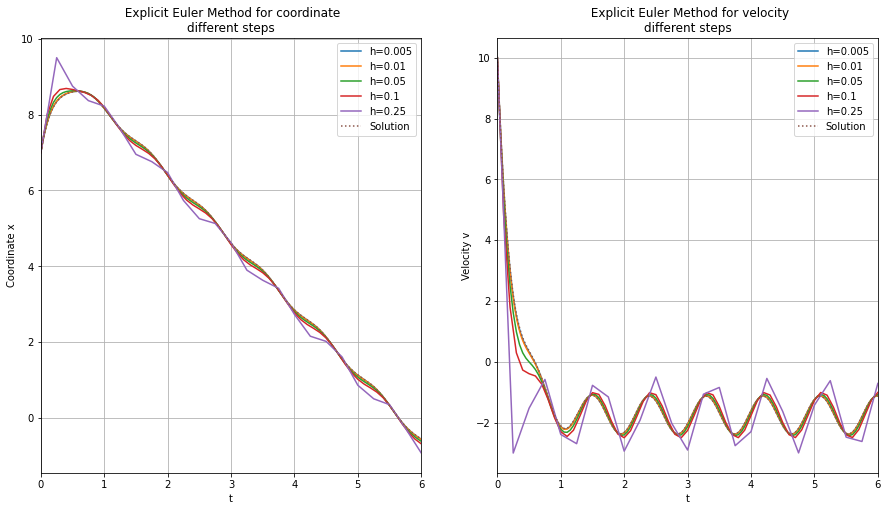

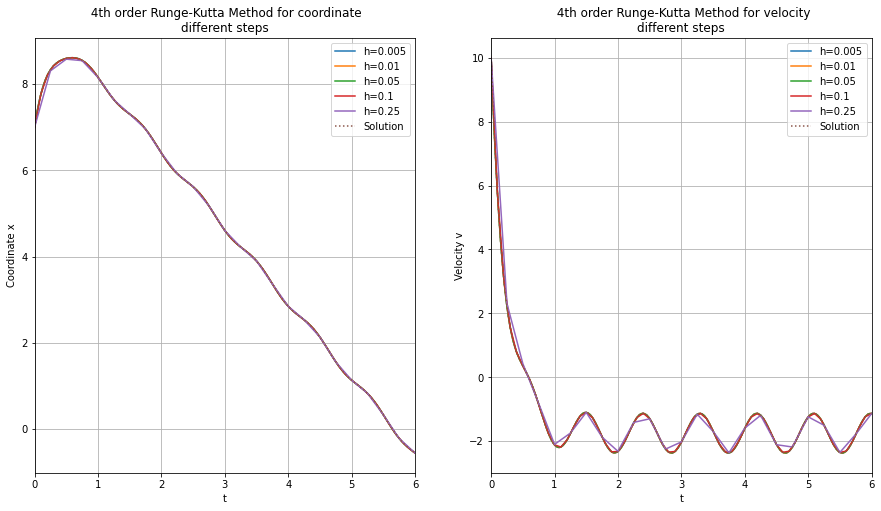

In [ ]:
StabilityAnalysis(ExplEuler,H1,0,6,X03,equation1,solution1)
StabilityAnalysis(Runge4,H1,0,6,X03,equation1,solution1)

 Висновок: метод Рунге-Кути дає більш стійкий розв'язок ніж явний метод Ейлера

### Аналіз точності

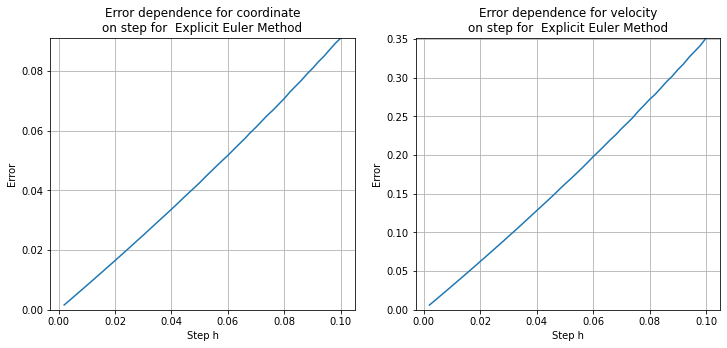

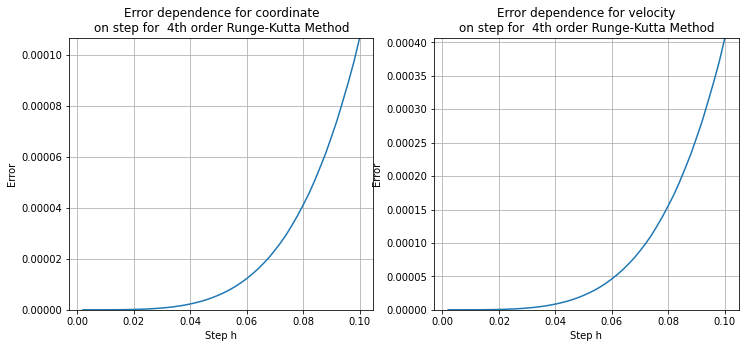

In [ ]:
Error(ExplEuler,H2,t0,tn,x0,equation1,solution1)
Error(Runge4,H2,t0,tn,x0,equation1,solution1)

За графіками помилок ми знову бачимо, що для задачі 1 найбільш точним виявився Метод Рунге-Кути 4-го порядку. Похибка від кроку має залежність  $$(e^{ah}-1), a>0 $$, а у явного  метода Ейлера лінійна залежність похибки від кроку, це значить що при великих h метод Ейлера може бути точнішим, але якщо ми будемо зменшувати, h то точність метода Рунге-Кутте буде зростити дуже швидко.